Classification is about to predicting a class or discrete values, eg : true or false

Regression is about predicting a quantity or continous values, eg : salary, age, price

The dataset is from sklearn datasets and we want to predict the house price

In [4]:
pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/24/ec/ad387100fa3cc2b9b81af0829b5ecfe75ec5bb19dd7c19d4fea06fb81802/xgboost-2.0.3-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/99.8 MB 3.4 MB/s eta 0:00:30
   ---------------------------------------- 0.1/99.8 MB 1.3 MB/s eta 0:01:16
   ---------------------------------------- 0.2/99.8 MB 2.2 MB/s eta 0:00:47
   ---------------------------------------- 0.3/99.8 MB 2.2 MB/s eta 0:00:45
   ---------------------------------------- 0.3/99.8 MB 2.2 MB/s eta 0:00:45
   ---------------------------------------- 0.3/99.8 MB 1.6 MB/s eta 0:01:05
   ---------------------------------------- 0.5/99.8 MB 1.6 MB/s eta 0:01:03
   ---------------------------------------- 0.6/99.8 MB 1.7 MB/s eta 0:00:58
   ---------------------------------------- 0.6/99.8 MB 1.6 MB/s eta 0:01:01
   -----------------------------

In [13]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [14]:
california_dataset = fetch_california_housing()

In [17]:
print(california_dataset)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

In [21]:
df = pd.DataFrame(california_dataset.data, columns=california_dataset.feature_names)

In [22]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [23]:
df['price'] = california_dataset.target

In [26]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [27]:
df.shape

(20640, 9)

In [31]:
#checkk missing value
df.info() #you can use this or isnull function below
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
price         0
dtype: int64

In [32]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


### Understanding the correlation between various features in dataset
1. Positive Correlation
2. Negative Correlation

In [33]:
correlation = df.corr()

<Axes: >

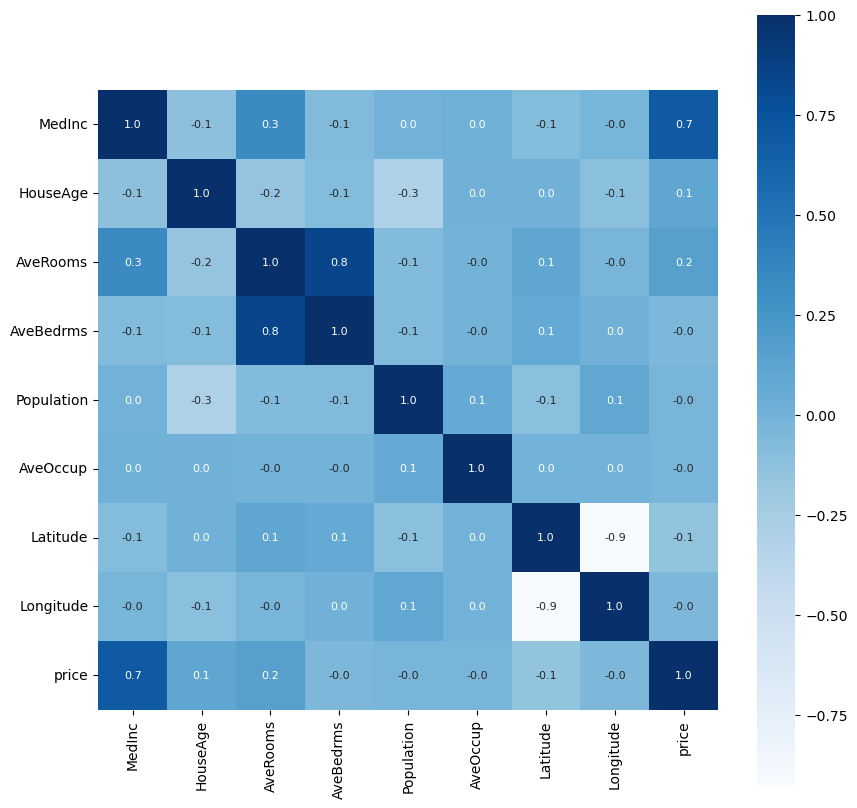

In [37]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')
#cbar means put the color bar in the side, square means all the values are mentioned in a square
#fmt means how many float, 1 is one value after the decimal point
#annot means all the feature name, annot_kws means size of each featuresn name, cmap is the color of the heatmap

### Splitting

In [38]:
X = df.drop(['price'], axis=1)
y = df.price

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

### Training the XGBoost Model 

In [41]:
model = XGBRegressor()

In [42]:
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

### Evaluation

In [50]:
#Prediction on test data
train_pred = model.predict(X_train)

In [51]:
print(train_pred)

[0.5523039 3.0850039 0.5835302 ... 1.9204227 1.952873  0.6768683]


In [52]:
# R squared error, in classification the common metric used for evaluation is accuracy and in regression is R squared error 
score_1 = metrics.r2_score(y_train, train_pred)

# Mean absolute error
score_2 = metrics.mean_absolute_error(y_train, train_pred)

In [53]:
print('R squared error : ', score_1)
print('Mean absolute error : ', score_2)

R squared error :  0.943650140819218
Mean absolute error :  0.1933648700612105


### Visualizing the actual prices and prediction

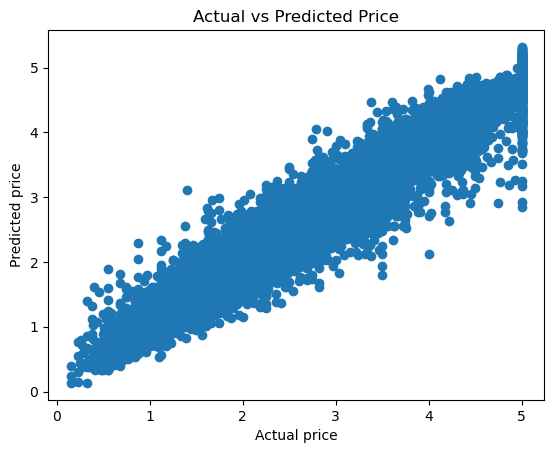

In [54]:
plt.scatter(y_train, train_pred)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual vs Predicted Price')
plt.show()